## Question 1

In [928]:
def sampling(N):
    l=[]
    l=np.random.uniform(0,1,N)
    n1=len([i for i in l if (i<=0.15)])
    n2=len([i for i in l if (i >= 0.15 and i<=0.48)])
    n3=len([i for i in l if (i >= 0.48 and i<=0.83)])
    n4=len([i for i in l if (i >= 0.83 and i<1)])
    return n1,n2,n3,n4



In [929]:
def linear_transformation(mu, cov, n):
    mean=[0,0]
    covariance=[[1,0],[0,1]]
    
    
    z = np.random.multivariate_normal(mean,covariance,n).T
    b = mu
    A = np.linalg.cholesky(cov)
    
    x=np.dot(A,z)
    
    for i in range(0,n):
        x[:,i]=x[:,i]+b
    
    return x

151 324 355 170


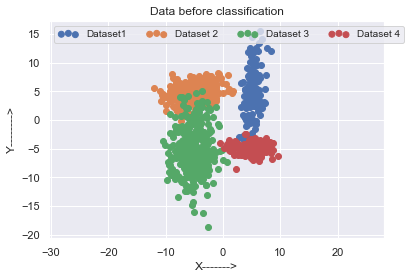

In [930]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

mu1=np.array([[5,5]])
mu2=np.array([[-5,5]])
mu3=np.array([[-5,-5]])
mu4=np.array([[5,-5]])

cov1=np.array([[1, 1],[1 ,20]])
cov2 =np.array([[7, 1],[1, 2]])
cov3= np.array([[4, 1],[1 ,16]])
cov4=np.array([[3,0],[0,1]])

pw1=0.15;
pw2=0.33;
pw3=0.35;
pw4=0.17;

n1,n2,n3,n4=sampling(1000)
print(n1,n2,n3,n4)
x1=linear_transformation(mu1,cov1,n1).T
x2=linear_transformation(mu2,cov2,n2).T
x3=linear_transformation(mu3,cov3,n3).T
x4=linear_transformation(mu4,cov4,n4).T

plt.scatter(x1[:,0],x1[:,1],label='Dataset1');
plt.scatter(x2[:,0],x2[:,1],label ='Dataset 2');
plt.scatter(x3[:,0],x3[:,1],label='Dataset 3');
plt.scatter(x4[:,0],x4[:,1],label='Dataset 4');
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()



In [931]:
def prepare_dataset(n1,n2,n3,n4):
    x1=linear_transformation(mu1,cov1,n1).T
    x2=linear_transformation(mu2,cov2,n2).T
    x3=linear_transformation(mu3,cov3,n3).T
    x4=linear_transformation(mu4,cov4,n4).T
    stacked=np.vstack((x1,x2,x3,x4))
    return stacked
Y_sklearn=prepare_dataset(n1,n2,n3,n4)

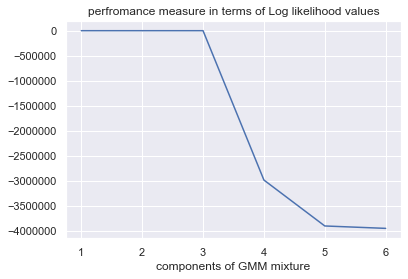

{1: -6.612728486027869, 2: -13.376351234035216, 3: -29.496844742887003, 4: -2989089.034427784, 5: -3908379.3568846285, 6: -3956504.883583024}
[0.6612728486027869, 1.3376351234035215, 2.9496844742887003, 29890.89034427784, 390.83793568846284, 39.56504883583024]


In [932]:
n1,n2,n3,n4=sampling(10)
kf=KFold(n_splits=10)
Dict={}
Y_sklearn=prepare_dataset(n1,n2,n3,n4)

d_10=[]
d_100=[]
d_100=[]
d_1000=[]
d_10000=[]


# dataset-10 no_of_components=1
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=1, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[1]=Perf/10
d_10.append(-Perf/100)

# dataset-10 no_of_components=2
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=2, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[2]=Perf/10
d_10.append(-Perf/100)

# dataset-10 no_of_components=3
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=3, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[3]=Perf/10
d_10.append(-Perf/100)

# dataset-10 no_of_components=4
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=4, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[4]=Perf/10
d_10.append(-Perf/1000)

# dataset-10 no_of_components=5
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=5, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[5]=Perf/10
d_10.append(-Perf/100000)

# dataset-10 no_of_components=6
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=6, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[6]=Perf/10
d_10.append(-Perf/1000000)

plt.plot(range(len(Dict)), list(Dict.values()))
plt.xticks(range(len(Dict)), list(Dict.keys()))
plt.xlabel('components of GMM mixture')
plt.title('perfromance measure in terms of Log likelihood values')
plt.show()

print(Dict)

print(d_10)

(-6.462092685973118, 5.8213599836338625, -7.629086139214959, 8.110803034319064)

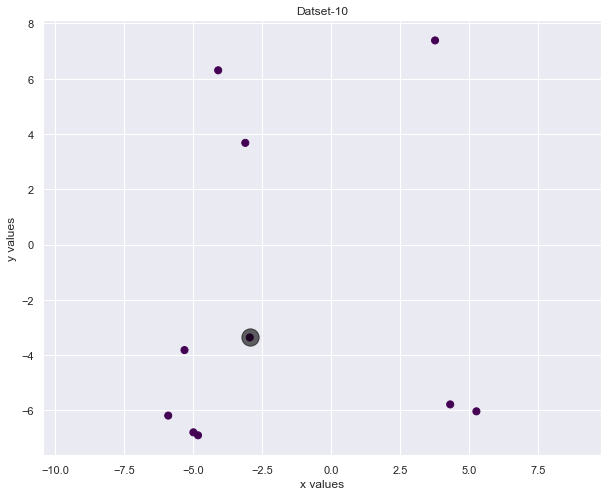

In [933]:

gmm = GaussianMixture(n_components=1, covariance_type='full').fit(Y_sklearn)
prediction_gmm = gmm.predict(Y_sklearn)
probs = gmm.predict_proba(Y_sklearn)

centers = np.zeros((1,2))
for i in range(1):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Datset-10')
plt.axis('equal')


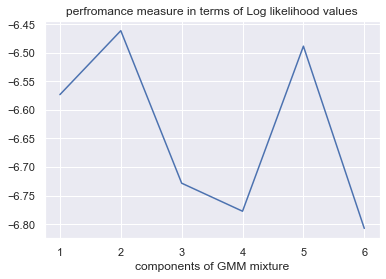

{1: -6.573146298950734, 2: -6.461166859727443, 3: -6.7282781067465365, 4: -6.777408156967583, 5: -6.488284094566386, 6: -6.807436849030227}
[6.573146298950734, 6.461166859727443, 6.7282781067465365, 6.777408156967583, 6.488284094566386, 6.807436849030227]


In [934]:
n1,n2,n3,n4=sampling(100)
kf=KFold(n_splits=10)
Dict={}
Y_sklearn=prepare_dataset(n1,n2,n3,n4)


# dataset-10 no_of_components=1
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=1, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[1]=Perf/10
d_100.append(-Perf/10)
# dataset-10 no_of_components=2
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=2, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[2]=Perf/10
d_100.append(-Perf/10)

# dataset-10 no_of_components=3
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=3, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[3]=Perf/10
d_100.append(-Perf/10)

# dataset-10 no_of_components=4
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=4, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[4]=Perf/10
d_100.append(-Perf/10)

# dataset-10 no_of_components=5
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=5, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[5]=Perf/10
d_100.append(-Perf/10)

# dataset-10 no_of_components=6
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=6, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[6]=Perf/10
d_100.append(-Perf/10)

plt.plot(range(len(Dict)), list(Dict.values()))
plt.xticks(range(len(Dict)), list(Dict.keys()))
plt.xlabel('components of GMM mixture')
plt.title('perfromance measure in terms of Log likelihood values')
plt.show()

print(Dict)

print(d_100)

(-15.53688006369239, 7.50344674289023, -16.166159957628516, 14.027089666366209)

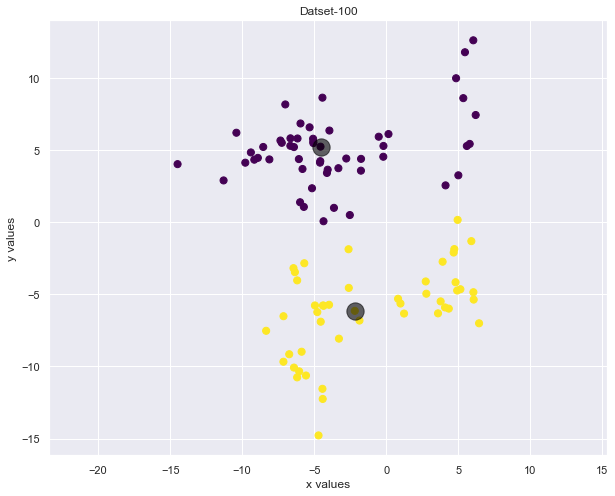

In [935]:
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(Y_sklearn)
prediction_gmm = gmm.predict(Y_sklearn)
probs = gmm.predict_proba(Y_sklearn)

centers = np.zeros((2,2))
for i in range(2):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Datset-100')
plt.axis('equal')
plt.axis('equal')

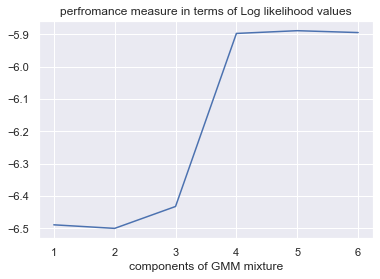

{1: -6.488871905496303, 2: -6.499873768782936, 3: -6.432190200027987, 4: -5.897308435316879, 5: -5.888848341312217, 6: -5.894619723436983}


In [936]:
n1,n2,n3,n4=sampling(1000)
kf=KFold(n_splits=10)
Dict={}
Y_sklearn=prepare_dataset(n1,n2,n3,n4)


# dataset-10 no_of_components=1
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=1, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[1]=Perf/10
d_1000.append(-Perf/10)
# dataset-10 no_of_components=2
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=2, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[2]=Perf/10
d_1000.append(-Perf/10)

# dataset-10 no_of_components=3
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=3, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[3]=Perf/10
d_1000.append(-Perf/10)

# dataset-10 no_of_components=4
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=4, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[4]=Perf/10
d_1000.append(-Perf/10)

# dataset-10 no_of_components=5
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=5, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[5]=Perf/10
d_1000.append(-Perf/10)

# dataset-10 no_of_components=6
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=6, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[6]=Perf/10
d_1000.append(-Perf/10)

plt.plot(range(len(Dict)), list(Dict.values()))
plt.xticks(range(len(Dict)), list(Dict.keys()))
plt.xlabel('components of GMM mixture')
plt.title('perfromance measure in terms of Log likelihood values')
plt.show()

print(Dict)



(-13.816794876909453,
 10.883790668414912,
 -17.67912552965033,
 19.605214218528978)

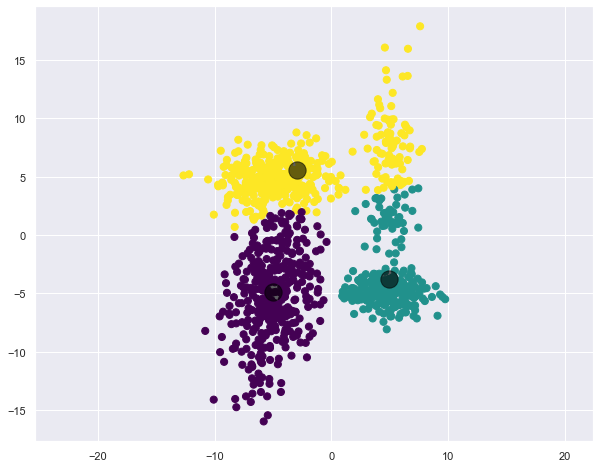

In [937]:
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(Y_sklearn)
prediction_gmm = gmm.predict(Y_sklearn)
probs = gmm.predict_proba(Y_sklearn)

centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
plt.axis('equal')

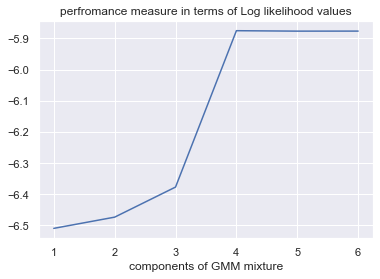

{1: -6.509431243851234, 2: -6.473395518467896, 3: -6.376858685110934, 4: -5.875016727806369, 5: -5.8764405555729295, 6: -5.87631014218264}


In [938]:
n1,n2,n3,n4=sampling(10000)
kf=KFold(n_splits=10)
Dict={}
Y_sklearn=prepare_dataset(n1,n2,n3,n4)


# dataset-10 no_of_components=1
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=1, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[1]=Perf/10
d_10000.append(-Perf/10)
# dataset-10 no_of_components=2
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=2, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[2]=Perf/10
d_10000.append(-Perf/10)

# dataset-10 no_of_components=3
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=3, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[3]=Perf/10
d_10000.append(-Perf/10)

# dataset-10 no_of_components=4
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=4, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[4]=Perf/10
d_10000.append(-Perf/10)

# dataset-10 no_of_components=5
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=5, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[5]=Perf/10
d_10000.append(-Perf/10)

# dataset-10 no_of_components=6
Perf=0
for train_index, test_index in kf.split(Y_sklearn):
    train=Y_sklearn[train_index]
    test=Y_sklearn[test_index]
    gmm = GaussianMixture(n_components=6, covariance_type='full').fit(train)
    Perf=Perf + gmm.score(test)

Dict[6]=Perf/10
d_10000.append(-Perf/10)

plt.plot(range(len(Dict)), list(Dict.values()))
plt.xticks(range(len(Dict)), list(Dict.keys()))
plt.xlabel('components of GMM mixture')
plt.title('perfromance measure in terms of Log likelihood values')
plt.show()

print(Dict)



Text(0.5, 1.0, 'Datset-10000')

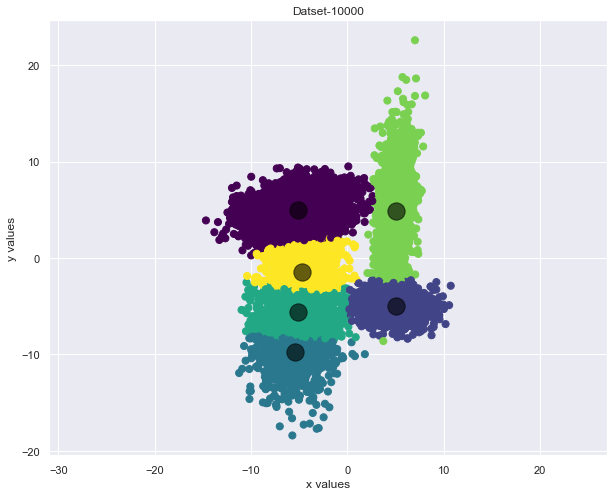

In [947]:
gmm = GaussianMixture(n_components=6, covariance_type='full').fit(Y_sklearn)
prediction_gmm = gmm.predict(Y_sklearn)
probs = gmm.predict_proba(Y_sklearn)

centers = np.zeros((6,2))
for i in range(6):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
plt.axis('equal')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Datset-10000')

(-15.952088103374852,
 12.008077919742492,
 -20.47169242429481,
 24.66207382771545)

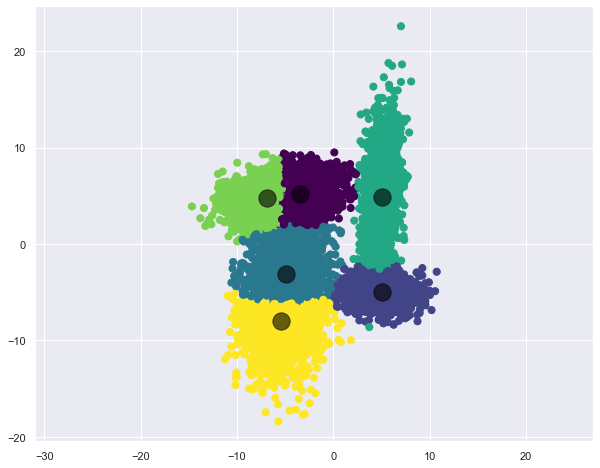

In [940]:
gmm = GaussianMixture(n_components=6, covariance_type='full').fit(Y_sklearn)
prediction_gmm = gmm.predict(Y_sklearn)
probs = gmm.predict_proba(Y_sklearn)

centers = np.zeros((6,2))
for i in range(6):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
plt.axis('equal')

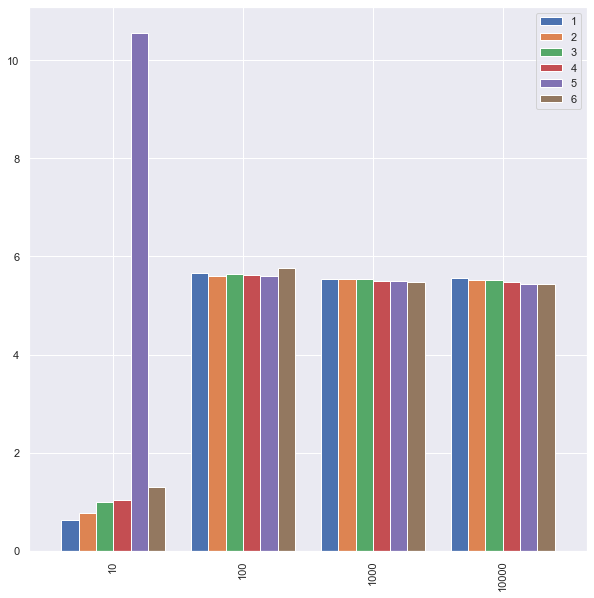

In [722]:
import pandas as pd        
import seaborn 
seaborn.set() 

groups=[d_10,d_100,d_1000,d_10000]
group_labels = ["10", "100","1000","10000"]

df = pd.DataFrame(groups,index=group_labels)

ax=df.plot(kind='bar', legend=True, width=0.8, figsize=(10,10))
ax.legend(['1','2','3','4','5','6'])

In [723]:
groups=[d_10,d_100,d_1000,d_10000]
d_10

[0.6188298877257401,
 0.7664626128425448,
 1.000110065888693,
 1.0349897792686507,
 10.559274663261496,
 1.299845220782847]

(-12.645878007649426,
 9.247075558235188,
 -21.66184073131666,
 18.315352650308714)

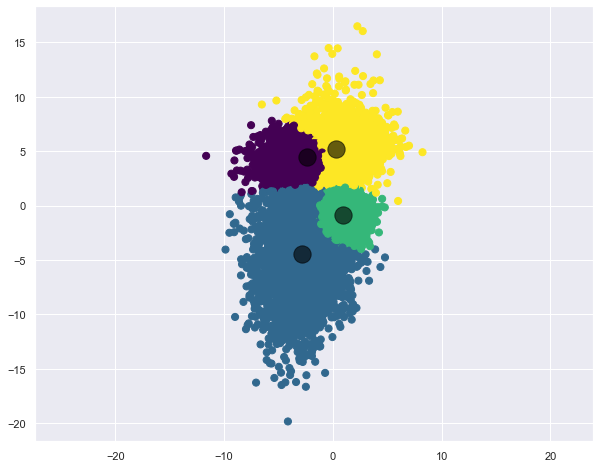

In [869]:

gmm = GaussianMixture(n_components=4, covariance_type='full').fit(Y_sklearn)
prediction_gmm = gmm.predict(Y_sklearn)
probs = gmm.predict_proba(Y_sklearn)

centers = np.zeros((4,2))
for i in range(4):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
plt.axis('equal')



    


## Question 2

In [949]:
l=[]
l=np.random.uniform(0,1,999)
n1=len([i for i in l if i <= 0.3])
n2=len([i for i in l if i >= 0.3])
print(n1,n2)

312 687


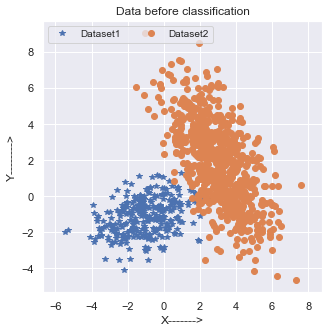

In [954]:
plt.figure(figsize=(5,5))
mu1=[-1,-1]
mu2=[3,2]

cov1=[[2,0.5],[0.5,1]]
cov2=[[2,-1.9],[-1.9,5]]

x5=linear_transformation(mu1,cov1,n1)
x5_axis=x5[0,:]
y5_axis=x5[1,:]

x6=linear_transformation(mu2,cov2,n2)
x6_axis=x6[0,:]
y6_axis=x6[1,:]

plt.plot(x5_axis,y5_axis,'*',label='Dataset1');
plt.plot(x6_axis,y6_axis,'o',label='Dataset2');
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()

In [955]:
def pdf(x, mu, cov):
    det = np.linalg.det(cov)
    norm_const = 1.0/ ( math.pow((2*np.pi),float(2)/2) * math.pow(det,1.0/2) )
    x_mu = np.matrix(x - mu)
    inv = cov.I
    result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
    return norm_const * result


Misclassifications of Dataset 1 = 22
Misclassifications of Dataset 2 = 4
probabilty of error  0.026026026026026026
MAP Accuracy 0.973973973973974


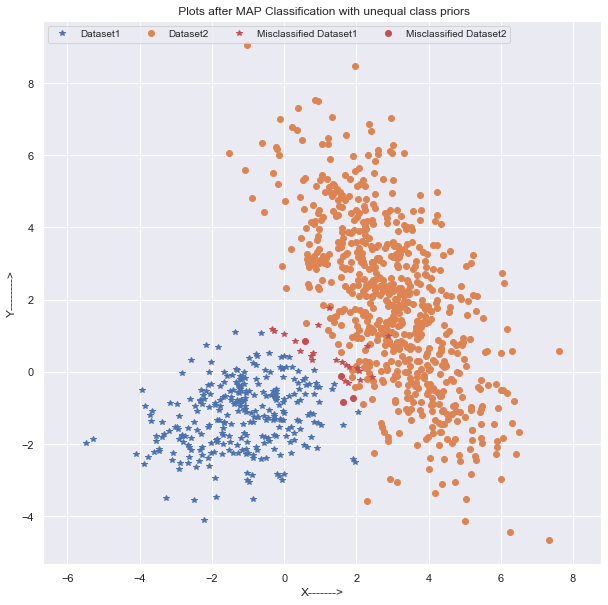

In [956]:
import math

plt.figure(figsize=(10,10))
error5=[]
error6=[]

res5=[]
res6=[]

for i in range(n1):
    if(pdf(np.matrix(x5[:,i]), mu1, np.matrix(cov1))*pw1 > pdf(np.matrix(x5[:,i]), mu2, np.matrix(cov1))*pw2 ):
        res5.append(x5[:,i])
    else:
        error5.append(x5[:,i])
        
for i in range(n2):
    if(pdf(np.matrix(x6[:,i]), mu2, np.matrix(cov2))*pw2 > pdf(np.matrix(x6[:,i]), mu1, np.matrix(cov1))*pw1 ):
        res6.append(x6[:,i])
    else:
        error6.append(x6[:,i])
        
P_error=(len(error5)+len(error6))/999
print("Misclassifications of Dataset 1 =", len(error5))
print("Misclassifications of Dataset 2 =", len(error6))
print("probabilty of error ", P_error)
print("MAP Accuracy",1-P_error)

def column(matrix, i):
    return [row[i] for row in matrix]

plt.plot(column(res5,0),column(res5,1),'*',label='Dataset1');
plt.plot(column(res6,0),column(res6,1),'o',label='Dataset2');
plt.plot(column(error5,0),column(error5,1),'*',color='r',label='Misclassified Dataset1');
plt.plot(column(error6,0),column(error6,1),'o',color='r',label='Misclassified Dataset2');
plt.axis('equal')
plt.title(" Plots after MAP Classification with unequal class priors")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()

In [957]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Y1=np.array([[1] for i in range(n1)])
X1_train,X1_test,y1_train,y1_test=train_test_split(x5.T, Y1, test_size=0.1, random_state=42)
Y2=np.array([[0] for i in range(n2)])
X2_train,X2_test,y2_train,y2_test=train_test_split(x6.T, Y2, test_size=0.1, random_state=42)

x5=X1_train.T
n1=x5.shape[1]
x6=X2_train.T
n2=x6.shape[1]

[ 0.89030849 -0.45535788]
Threshold value =  0.14287496061745864
Misclassifications of Dataset1 =  28
Misclassifications of Dataset2 =  23
Probability of error in training =  0.05679287305122494


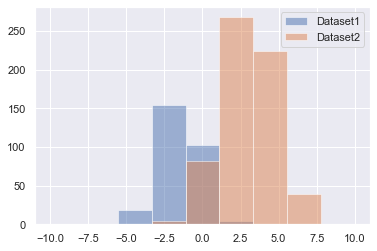

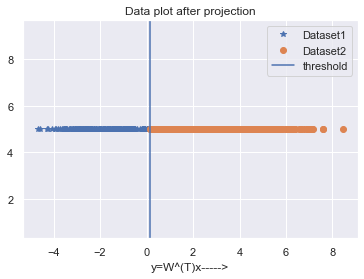

In [958]:
#plt.figure(figsize=(10,10))
mean1=np.array([np.mean(x5.T[:,0]), np.mean(x5.T[:,1])])
mean2=np.array([np.mean(x6.T[:,0]), np.mean(x6.T[:,1])])

Sb=np.dot((mean1-mean2),(mean1-mean2).T)
Sw=np.cov(x5)+np.cov(x6)

M=np.dot(np.linalg.inv(Sw),Sb)

w,v=np.linalg.eig(M)
i=np.argmax(w)

W=v[i]
print(W)

y1=[]
y2=[]

for i in range(n1):
    y1.append(np.cross(W.T,x5[:,i]))
for i in range(n2):
    y2.append(np.cross(W.T,x6[:,i]))
    
y_axis=[6 for x in range(400)]
proj_mean1=np.dot(W.T,mean1)
proj_mean2=np.dot(W.T,mean2)

resy1=[]
resy2=[]
error1=[]
error2=[]

th=y1+y2

P_error=[]

for x in range(len(th)):
        
    for i in range(n1):
        if(y1[i]<th[x]):
            resy1.append(y1[i])
        else:
            error1.append(y1[i])
    for i in range(n2):
        if(y2[i]>th[x]):
            resy2.append(y2[i])
        else:
            error2.append(y2[i])
            
    P_error.append((len(error1)+len(error2))/2)
    error1.clear()
    error2.clear()
#Calculating the the threshold for which we can obtain min error    
j=np.argmin(np.array(P_error))
print("Threshold value = ", th[j])

threshold=th[j]
resy1.clear()
resy2.clear()

error1.clear()
error2.clear()
for i in range(n1):
    if(y1[i]<threshold):
        resy1.append(y1[i])
    else:
        error1.append(y1[i])
for i in range(n2):
    if(y2[i]>threshold):
        resy2.append(y2[i])
    else:
        error2.append(y2[i])
        
p_error_train=(len(error1)+len(error2))/(n1+n2)

print("Misclassifications of Dataset1 = ", len(error1))
print("Misclassifications of Dataset2 = ", len(error2))
print("Probability of error in training = ",p_error_train)
        
bins = np.linspace(-10, 10, 10)

plt.hist(y1, bins, alpha=0.5, label='Dataset1')
plt.hist(y2, bins, alpha=0.5, label='Dataset2')
plt.legend(loc='upper right')
plt.show()

plt.plot(resy1,[5 for x in range(len(resy1))],'*',label='Dataset1')
plt.plot(resy2,[5 for x in range(len(resy2))],'o',label='Dataset2')
plt.title('Data plot after projection')
plt.xlabel('y=W^(T)x----->')

plt.axvline(x=threshold,label='threshold')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()




In [959]:
x1test=X1_test.T
n1=x1test.shape[1]
x2test=X2_test.T
n2=x2test.shape[1]

0.14287496061745864
Misclassifications of Dataset1 =  6
Misclassifications of Dataset2 =  3
Probability of error in testing =  0.0891089108910891


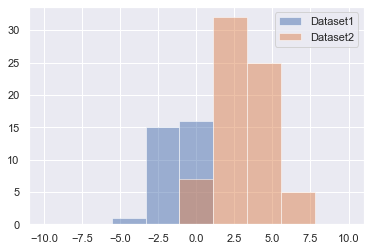

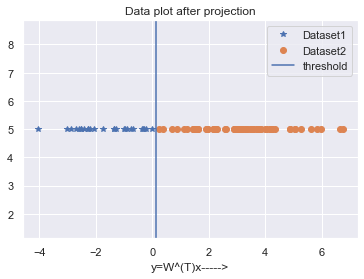

In [960]:
#plt.figure(figsize=(10,10))

y1=[]
y2=[]

for i in range(n1):
    y1.append(np.cross(W.T,x1test[:,i]))
for i in range(n2):
    y2.append(np.cross(W.T,x2test[:,i]))
    
y_axis=[6 for x in range(400)]
proj_mean1=np.dot(W.T,mean1)
proj_mean2=np.dot(W.T,mean2)

resy1=[]
resy2=[]
error1=[]
error2=[]



print(threshold)
for i in range(n1):
    if(y1[i]<threshold):
        resy1.append(y1[i])
    else:
        error1.append(y1[i])
for i in range(n2):
    if(y2[i]>threshold):
        resy2.append(y2[i])
    else:
        error2.append(y2[i])
        
p_error_test=(len(error1)+len(error2))/(n1+n2)

print("Misclassifications of Dataset1 = ", len(error1))
print("Misclassifications of Dataset2 = ", len(error2))
print("Probability of error in testing = ",p_error_test)
        
bins = np.linspace(-10, 10, 10)

plt.hist(y1, bins, alpha=0.5, label='Dataset1')
plt.hist(y2, bins, alpha=0.5, label='Dataset2')
plt.legend(loc='upper right')
plt.show()

plt.plot(resy1,[5 for x in range(len(resy1))],'*',label='Dataset1')
plt.plot(resy2,[5 for x in range(len(resy2))],'o',label='Dataset2')
plt.title('Data plot after projection')
plt.xlabel('y=W^(T)x----->')

plt.axvline(x=threshold,label='threshold')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()




training accuracy : 0.9432071269487751
testing accuracy : 0.9108910891089109


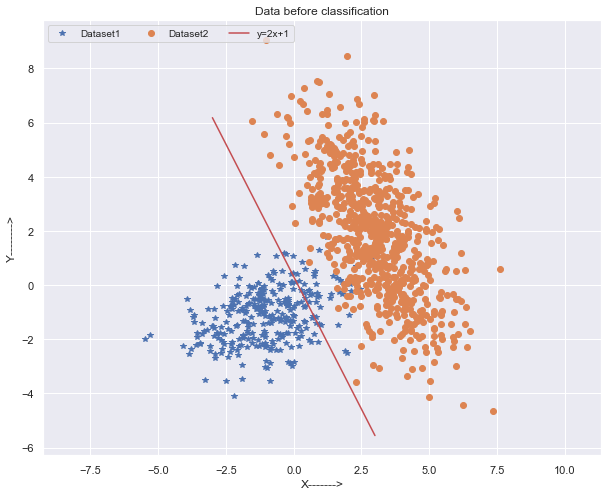

In [961]:

plt.figure(figsize = (10,8))
plt.plot(x5_axis,y5_axis,'*',label='Dataset1');
plt.plot(x6_axis,y6_axis,'o',label='Dataset2');

print('training accuracy :',1-p_error_train)
print('testing accuracy :',1-p_error_test)

x = np.linspace(-3,3,100)
y = (W[0]/W[1])*x-threshold/W[1]
plt.plot(x, y, '-r', label='y=2x+1')
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()


In [962]:
X_train=np.vstack((X1_train,X2_train))
X_test=np.vstack((X1_test,X2_test))
y_train=np.vstack((y1_train,y2_train))
y_test=np.vstack((y1_test,y2_test))


In [963]:
#intialising the prarameters
w=np.array([W])
b=0

In [964]:
def logistic_fn(x):
    res = 1/(1+np.exp(x))
    return res    

In [965]:
def model_optimise(w,b,X,Y):
    m=X.shape[0]
    
    res=logistic_fn(np.dot(w,X.T)+b)
    Y_T=Y.T
    derivative = (-1/m)*(np.sum((Y_T*np.log(res)) + ((1-Y_T)*(np.log(1-res)))))
    
    #Gradient ascent
    dw = (1/m)*(np.dot(X.T, (res-Y.T).T))
    db = (1/m)*(np.sum(res-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, derivative

    
    

In [966]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimise(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w + (learning_rate * (dw.T))
        b = b + (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [967]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [971]:
#Get number of features
n_features = X_train.shape[1]
w= np.zeros((1,2))
b=0
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_train, y_train, learning_rate=0.01,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Weight vector W', w)
print('Intercept b',b)
#
final_train_pred = logistic_fn(np.dot(w,X_train.T)+b)
final_test_pred = logistic_fn(np.dot(w,X_test.T)+b)
#
m_tr =  X_train.shape[0]
m_ts =  X_test.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_train))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_test))

Weight vector W [[1.52809357 1.07417094]]
Intercept b -1.2365916775959314
Training Accuracy 0.9755011135857461
Test Accuracy 0.9801980198019802


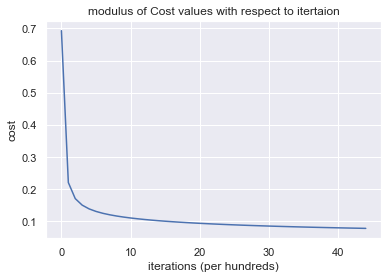

In [969]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('modulus of Cost values with respect to itertaion')
plt.show()

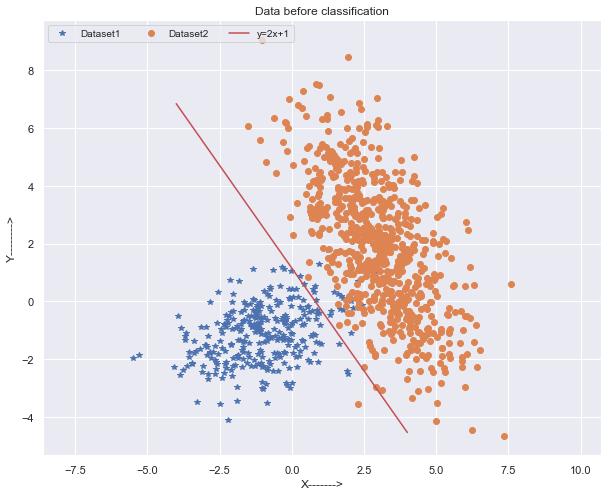

In [970]:
plt.figure(figsize = (10,8))
plt.plot(x5_axis,y5_axis,'*',label='Dataset1');
plt.plot(x6_axis,y6_axis,'o',label='Dataset2');

x = np.linspace(-4,4,100)
y = (-w[0,0]/w[0,1])*x-b/w[0,1]
plt.plot(x, y, '-r', label='y=2x+1')
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()


In [455]:
X5.shape[0]

125